Набор данных - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_test.csv 
Тип классификатора - LogisticRegression(логистическая регрессия) 
Классификация по стобцу - Education level (Graduate – класс 0, остальные уровни – класс 1)

#Устанавливаем необходимые библиотеки:

In [56]:
import pandas
import numpy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [15]:
data = pandas.read_csv('aug_test.csv', index_col='city')
#исключим столбец с уникальными значениями:
data = data[data.columns.drop(['enrollee_id'])]
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,,,,,,,,,,,
city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2098 non-null   object 
 4   education_level         2129 non-null   int32  
 5   major_discipline        1817 non-null   object 
 6   experience              2124 non-null   object 
 7   company_size            1507 non-null   object 
 8   company_type            1495 non-null   object 
 9   last_new_job            2089 non-null   object 
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 174.6+ KB


In [22]:
data['gender'] = numpy.where(data['gender'] == 'Male', 1, 0)
data['education_level'] = np.where(data['education_level'] == 'Graduate', 0, 1)
data['relevent_experience'] = np.where(data['relevent_experience'] == 'No relevent experience',0,1)

#Преобразуем текстовые данные в числовые:

In [31]:

Set1 = set(data.enrolled_university)
i = 0
for item in Set1:
    data['enrolled_university'] = data['enrolled_university'].replace(item, i)
    i = i + 1

    
Set2 = set(data.last_new_job)
i = 0
for item in Set2:
    data['last_new_job'] = data['last_new_job'].replace(item, i)
    i = i + 1
    
Set3 = set(data.major_discipline)
i = 0
for item in Set3:
    data['major_discipline'] = data['major_discipline'].replace(item, i)
    i = i + 1
    
Set4 = set(data.company_type)
i = 0
for item in Set4:
    data['company_type'] = data['company_type'].replace(item, i)
    i = i + 1
    
Set5 = set(data.company_size)
i = 0
for item in Set5:
    data['company_size'] = data['company_size'].replace(item, i)
    i = i + 1
    
Set6 = set(data.experience)
i = 0
for item in Set6:
    data['experience'] = data['experience'].replace(item, i)
    i = i + 1
    
data.loc[data.experience == 'NaN' , 'experience'] = 0
data.loc[data.last_new_job == 'never' , 'last_new_job'] = 0
data.loc[data.last_new_job == 'NaN' , 'major_discipline'] = 0
data.loc[data.last_new_job == 'NaN' , 'company_size'] = 0


In [32]:
data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,,,,,,,,,,,
city_41,0.827,0,1,2,1,5,13,2,0,2,21
city_103,0.920,0,1,3,1,5,19,0,5,2,98
city_21,0.624,0,1,3,1,0,15,0,5,5,15
city_13,0.827,0,1,3,1,5,0,5,5,2,39
city_103,0.920,0,1,3,1,5,8,1,5,6,72
...,...,...,...,...,...,...,...,...,...,...,...
city_103,0.920,0,1,3,1,4,14,0,4,3,15
city_136,0.897,0,1,3,1,5,17,0,0,1,30
city_100,0.887,0,1,3,1,0,18,0,5,5,18


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2129 non-null   int64  
 4   education_level         2129 non-null   int32  
 5   major_discipline        2129 non-null   int64  
 6   experience              2129 non-null   int64  
 7   company_size            2129 non-null   int64  
 8   company_type            2129 non-null   int64  
 9   last_new_job            2129 non-null   int64  
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 174.6+ KB


#Удаляем из данных целевой признак(education_level)

In [38]:
Data2 = data.education_level
train = data.drop('education_level', axis = 1)

In [70]:
train.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2129 non-null   int64  
 4   major_discipline        2129 non-null   int64  
 5   experience              2129 non-null   int64  
 6   company_size            2129 non-null   int64  
 7   company_type            2129 non-null   int64  
 8   last_new_job            2129 non-null   int64  
 9   training_hours          2129 non-null   int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 166.3+ KB


Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

#Разделяем данные на обучающую и тестовую выборку

In [88]:
education_level = data.loc[:, data.columns.isin(['education_level'])]
X_train, X_test, Y_train, Y_test = train_test_split(X,education_level, test_size = .33, random_state = 1)

In [91]:
Tree = DecisionTreeClassifier(random_state=30, max_depth = 10)
Tree = Tree.fit(X_train, Y_train)
Tree

DecisionTreeClassifier(max_depth=10, random_state=30)

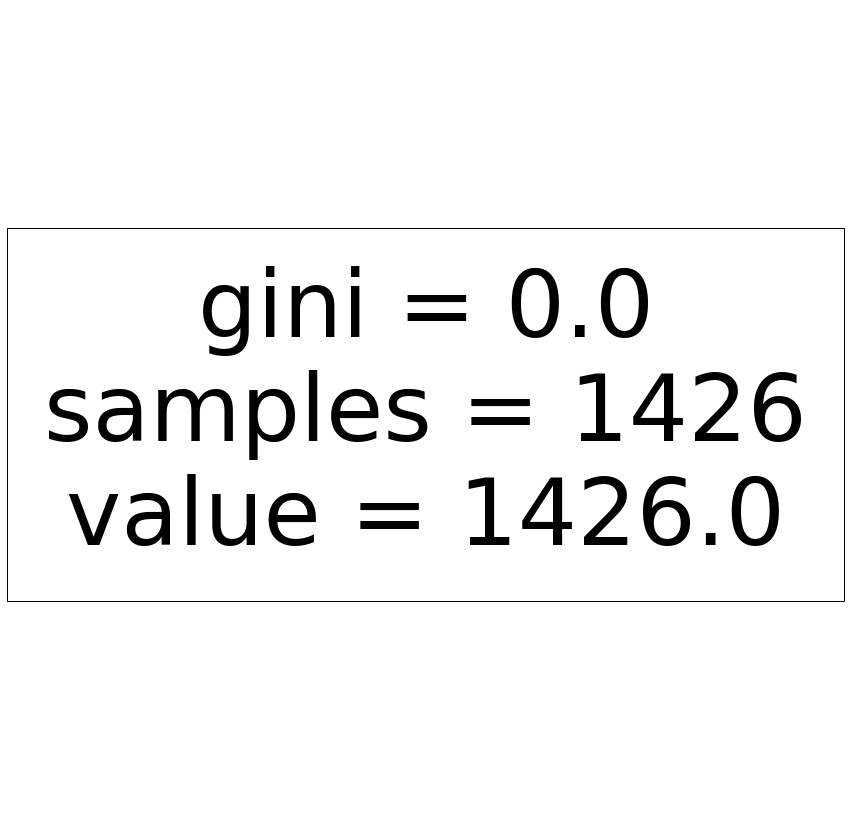

In [92]:
fig = plt.figure(figsize=(15,15))
_ = plot_tree(Tree, filled=True, class_names=True)